In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv("smartcart_customers.csv")
df.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,Complain,Response
0,5524,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,...,172,88,88,3,8,10,4,7,0,1
1,2174,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11,...,2,1,6,2,1,1,2,5,0,0
2,4141,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,...,111,21,42,1,8,2,10,4,0,0
3,6182,1984,Graduation,Together,26646.0,1,0,10-02-2014,26,11,...,10,3,5,2,2,0,4,6,0,0
4,5324,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,...,46,27,15,5,5,3,6,5,0,0


# Data Preprocessing

## 1. Handle Missing Values


In [3]:
df["Income"]= df["Income"].fillna(df["Income"].median())

In [4]:
df.isnull().sum()

ID                     0
Year_Birth             0
Education              0
Marital_Status         0
Income                 0
Kidhome                0
Teenhome               0
Dt_Customer            0
Recency                0
MntWines               0
MntFruits              0
MntMeatProducts        0
MntFishProducts        0
MntSweetProducts       0
MntGoldProds           0
NumDealsPurchases      0
NumWebPurchases        0
NumCatalogPurchases    0
NumStorePurchases      0
NumWebVisitsMonth      0
Complain               0
Response               0
dtype: int64

## Feature Engineering

In [5]:
#Age
df["Age"]=2026-df["Year_Birth"]
df.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,Complain,Response,Age
0,5524,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,...,88,88,3,8,10,4,7,0,1,69
1,2174,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11,...,1,6,2,1,1,2,5,0,0,72
2,4141,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,...,21,42,1,8,2,10,4,0,0,61
3,6182,1984,Graduation,Together,26646.0,1,0,10-02-2014,26,11,...,3,5,2,2,0,4,6,0,0,42
4,5324,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,...,27,15,5,5,3,6,5,0,0,45


In [6]:
df["Dt_Customer"] = pd.to_datetime(df["Dt_Customer"],dayfirst=True)
reference_date = df["Dt_Customer"].max()
df["Customer_Tenure_Days"] = (reference_date - df["Dt_Customer"] ).dt.days

In [7]:
df.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,Complain,Response,Age,Customer_Tenure_Days
0,5524,1957,Graduation,Single,58138.0,0,0,2012-09-04,58,635,...,88,3,8,10,4,7,0,1,69,663
1,2174,1954,Graduation,Single,46344.0,1,1,2014-03-08,38,11,...,6,2,1,1,2,5,0,0,72,113
2,4141,1965,Graduation,Together,71613.0,0,0,2013-08-21,26,426,...,42,1,8,2,10,4,0,0,61,312
3,6182,1984,Graduation,Together,26646.0,1,0,2014-02-10,26,11,...,5,2,2,0,4,6,0,0,42,139
4,5324,1981,PhD,Married,58293.0,1,0,2014-01-19,94,173,...,15,5,5,3,6,5,0,0,45,161


In [8]:
df["Total_Spending"] = df['MntWines']+df["MntFruits"]+df["MntMeatProducts"]+df["MntFishProducts"]+df["MntSweetProducts"]+df["MntGoldProds"]

In [9]:
df["Total_Children"]= df["Kidhome"]+df["Teenhome"]

In [10]:
# Education
df["Education"].value_counts()

df["Education"] = df["Education"].replace({
    "Basic": "Undergraduate",
    "2n Cycle": "Undergraduate",
    "Graduation": "Graduate",
    "Master": "Postgraduate",
    "PhD": "Postgraduate"
})

df["Education"].value_counts()

Education
Graduate         1127
Postgraduate      856
Undergraduate     257
Name: count, dtype: int64

In [11]:
# Marital Status
df["Living_With"] = df["Marital_Status"].replace({
    "Married": "Partner",
    "Together": "Partner",
    "Single": "Alone",
    "Divorced": "Alone",
    "Widow": "Alone",
    "Absurd": "Alone",
    "YOLO": "Alone"
})


## Drop Columns

In [12]:
cols = ["ID", "Year_Birth", "Marital_Status", "Kidhome", "Teenhome", "Dt_Customer"]

spending_cols = [
    "MntWines",
    "MntFruits",
    "MntMeatProducts",
    "MntFishProducts",
    "MntSweetProducts",
    "MntGoldProds"
]

cols_to_drop = cols + spending_cols

df_cleaned = df.drop(columns=cols_to_drop)

df_cleaned.shape

(2240, 15)

## Outliers

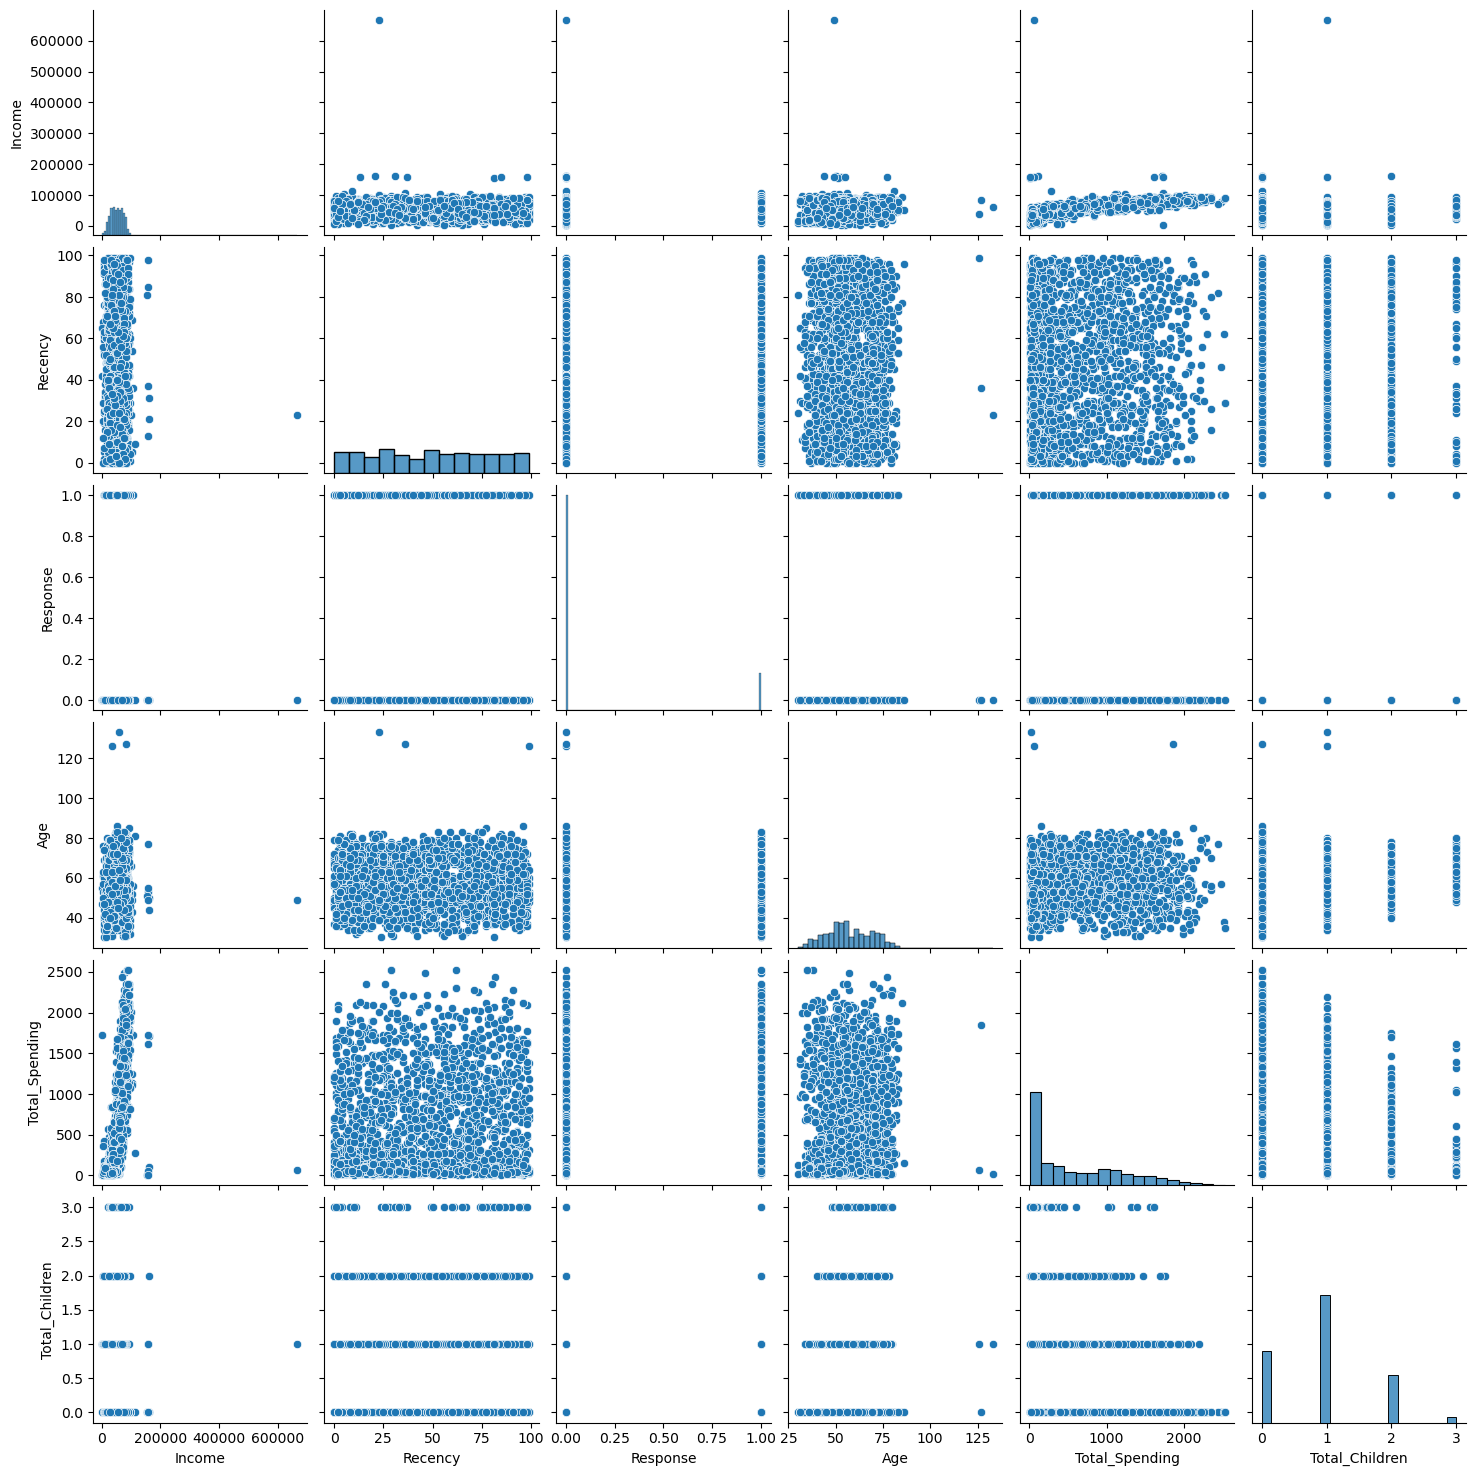

In [13]:
cols = ["Income","Recency","Response","Age","Total_Spending","Total_Children"]

#relative plot of some features - pair plots

sns.pairplot(df_cleaned[cols])

In [15]:
# Remove outliers
print("data size with outliers:", len(df_cleaned))

df_cleaned = df_cleaned[df_cleaned["Age"] < 90]
df_cleaned = df_cleaned[df_cleaned["Income"] < 600000]

print("data size without outliers:", len(df_cleaned))


data size with outliers: 2236
data size without outliers: 2236


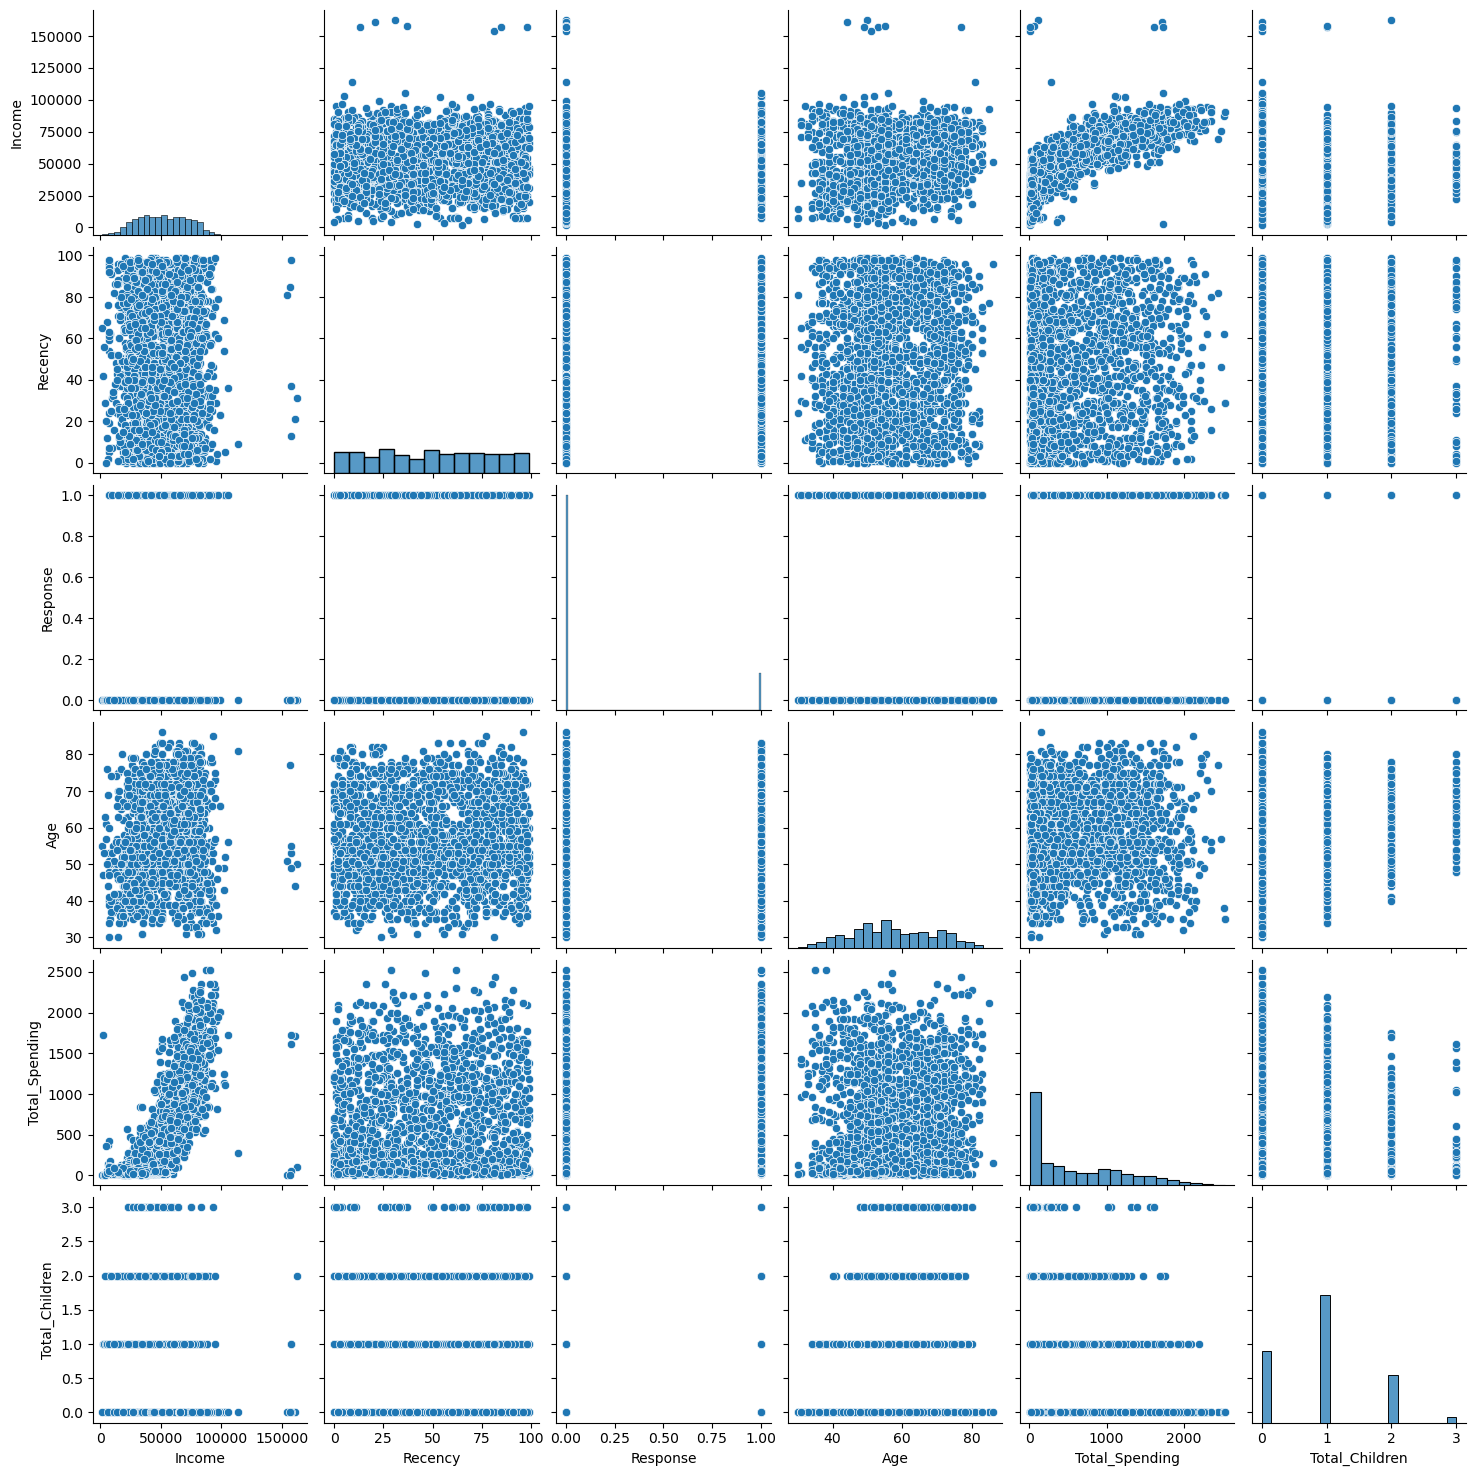

In [16]:
sns.pairplot(df_cleaned[cols])

## Heatmap

<Axes: >

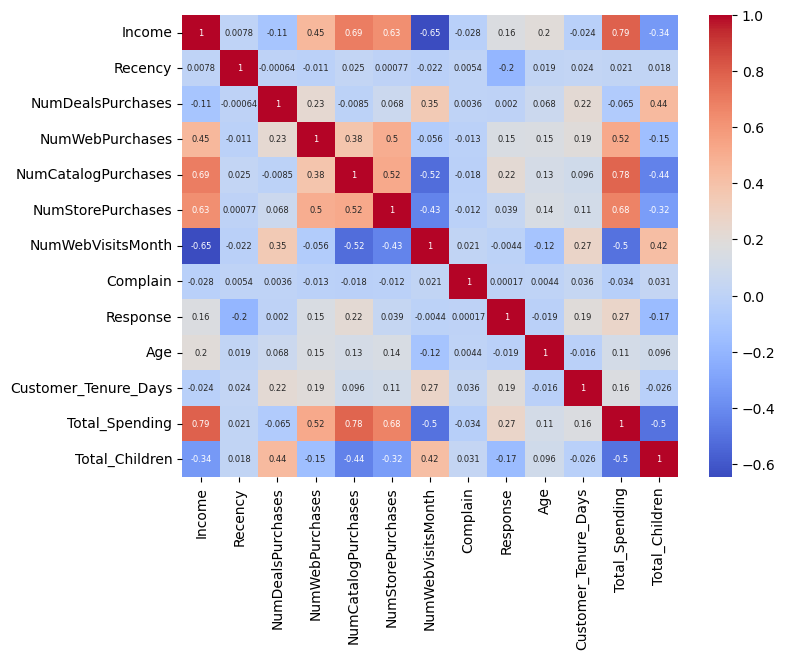

In [17]:
# Heatmap
corr = df_cleaned.corr(numeric_only=True)

plt.figure(figsize=(8, 6))
sns.heatmap(
    corr,
    annot=True,
    annot_kws={"size": 6},
    cmap="coolwarm"
)


## Encoding

In [18]:
from sklearn.preprocessing import OneHotEncoder

In [19]:

# Initialize the Encoder
ohe = OneHotEncoder()

# Specify the categorical columns to encode
cat_cols = ["Education", "Living_With"]

# Fit and transform the data
# enc_cols will be a sparse matrix by default
enc_cols = ohe.fit_transform(df_cleaned[cat_cols])

# Convert the results into a readable DataFrame
enc_df = pd.DataFrame(
    enc_cols.toarray(), 
    columns=ohe.get_feature_names_out(cat_cols), 
    index=df_cleaned.index
)

# Concatenate the new encoded columns and drop the original categorical columns
df_encoded = pd.concat([df_cleaned.drop(columns=cat_cols), enc_df], axis=1)

# Check the shape of the new dataframe
df_encoded.shape


(2236, 18)

## Scaling

In [20]:
from sklearn.preprocessing import StandardScaler

In [21]:
X=df_encoded

scaler=StandardScaler()

X_scaled = scaler.fit_transform(X)

In [22]:
X_scaled

array([[ 0.28894655,  0.30685572,  0.34873831, ..., -0.35877969,
         1.3476353 , -1.3476353 ],
       [-0.262003  , -0.38397129, -0.16869955, ..., -0.35877969,
         1.3476353 , -1.3476353 ],
       [ 0.91842301, -0.7984675 , -0.68613742, ..., -0.35877969,
        -0.74204052,  0.74204052],
       ...,
       [ 0.234898  ,  1.44672029, -0.68613742, ..., -0.35877969,
         1.3476353 , -1.3476353 ],
       [ 0.80780332, -1.42021181, -0.16869955, ..., -0.35877969,
        -0.74204052,  0.74204052],
       [ 0.04280841, -0.31488859,  0.34873831, ..., -0.35877969,
        -0.74204052,  0.74204052]], shape=(2236, 18))

## Visualization 

(2236, 18)


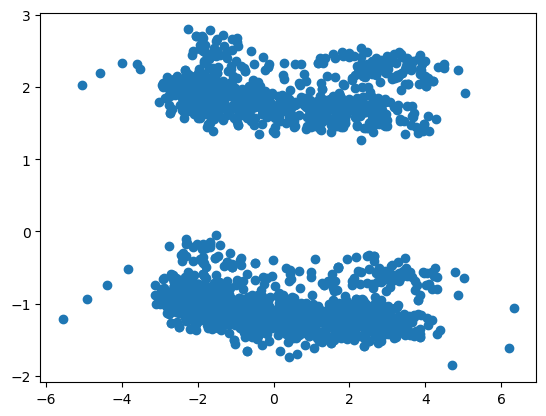

In [23]:
from sklearn.decomposition import PCA

# Check the shape of scaled data
print(X_scaled.shape)

# Initialize PCA to reduce data to 2 dimensions
pca = PCA(n_components=2)

# Fit and transform the scaled data
X_pca = pca.fit_transform(X_scaled)

# Plot the reduced data
plt.scatter(X_pca[:, 0], X_pca[:, 1])
plt.show()

In [24]:
pca.explained_variance_ratio_

array([0.23163158, 0.11385454])

In [25]:
#3d

pca = PCA(n_components=3)

# Fit and transform the scaled data
X_pca = pca.fit_transform(X_scaled)

In [26]:
pca.explained_variance_ratio_

array([0.23163158, 0.11385454, 0.10405815])

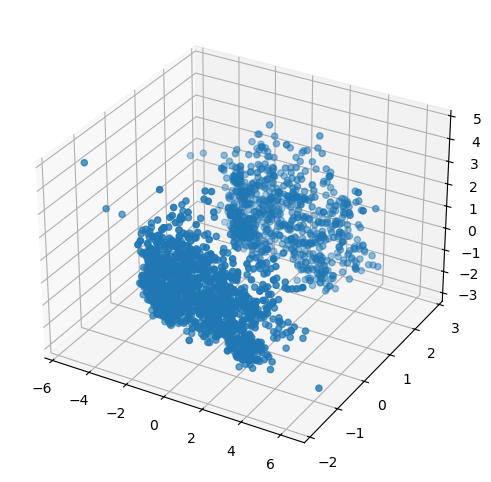

In [27]:
#plot

fig = plt.figure(figsize=(8,6))

ax = fig.add_subplot(111,projection="3d")

ax.scatter(X_pca[:, 0], X_pca[:, 1],X_pca[:,2])

# Analyze K value

## 1.Elbow Method

In [32]:
from sklearn.cluster import KMeans
from kneed import KneeLocator

wcss = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit_predict(X_pca)
    wcss.append(kmeans.inertia_)

knee = KneeLocator(range(1, 11), wcss, curve="convex", direction="decreasing")
optimal_k = knee.elbow

print("best k =", optimal_k)
print(wcss)

best k = 4
[18093.25779332453, 10760.84340175822, 8830.288717243044, 6650.969417658875, 5006.161168001195, 4396.308699108106, 3857.6330644275713, 3207.0576242216603, 3025.223255432582, 2651.4429891061445]


## 2. Silhouette Score

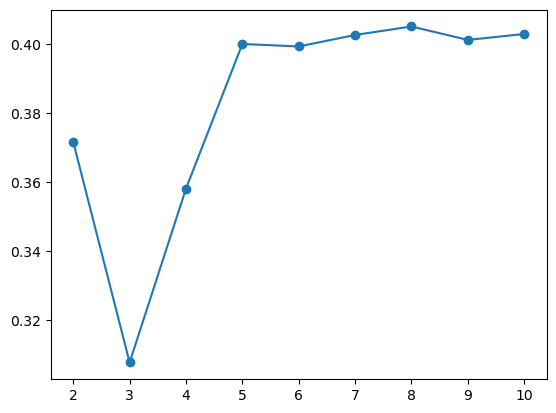

In [30]:
from sklearn.metrics import silhouette_score


scores = []

for k in range(2, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    labels=kmeans.fit_predict(X_pca)
    score = silhouette_score(X_pca,labels)
    scores.append(score)

plt.plot(range(2,11),scores, marker="o")


Text(0, 0.5, 'SS')

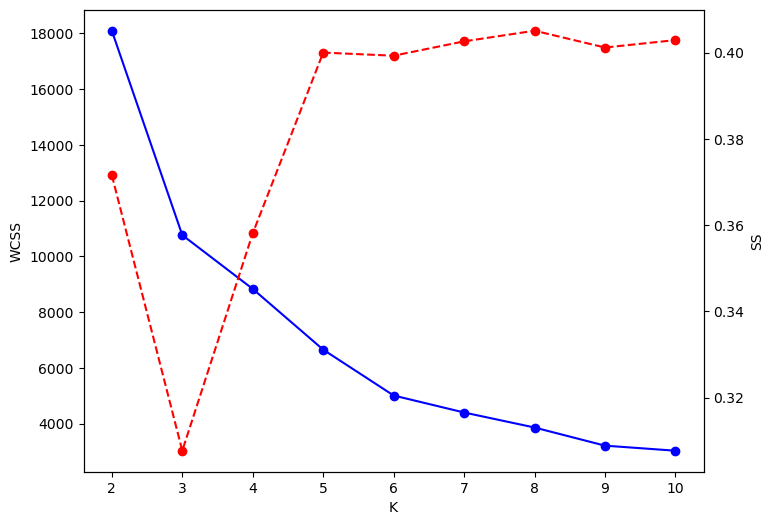

In [31]:
# combined plot
k_range = range(2, 11)

fig, ax1 = plt.subplots(figsize=(8, 6))

ax1.plot(k_range, wcss[:len(k_range)], marker="o", color="blue")
ax1.set_xlabel("K")
ax1.set_ylabel("WCSS")

ax2 = ax1.twinx()
ax2.plot(k_range, scores[:len(k_range)], marker="o", color="red", linestyle="--")
ax2.set_ylabel("SS")

# Clustering

In [33]:
#k_means

kmeans = KMeans(n_clusters=4, random_state=42)
labels_kmeans = kmeans.fit_predict(X_pca) 

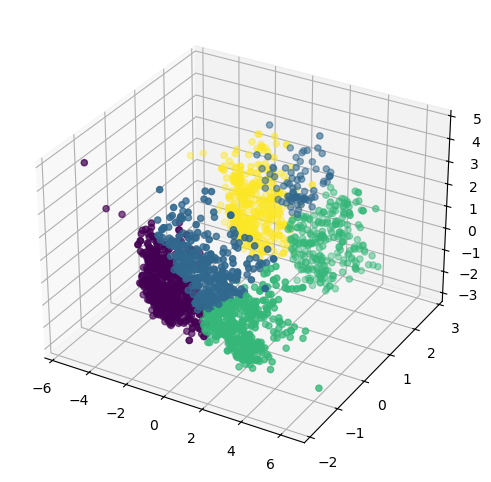

In [34]:
#plot

fig = plt.figure(figsize=(8,6))

ax = fig.add_subplot(111,projection="3d")

ax.scatter(X_pca[:, 0], X_pca[:, 1],X_pca[:,2],c=labels_kmeans)

In [35]:
from sklearn.cluster import AgglomerativeClustering

In [38]:

agg = AgglomerativeClustering(n_clusters=4,linkage="ward")
labels_agg = agg.fit_predict(X_pca)

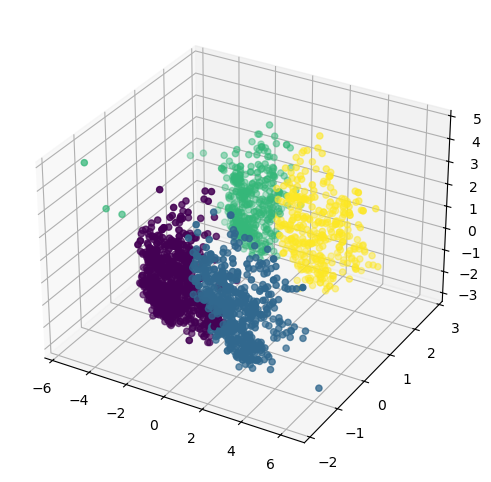

In [39]:

fig = plt.figure(figsize=(8,6))

ax = fig.add_subplot(111,projection="3d")

ax.scatter(X_pca[:, 0], X_pca[:, 1],X_pca[:,2],c=labels_agg)

# Characterization Of Clusters

In [48]:
X["cluster"]= labels_agg
X.head()

,Income,Recency,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,Complain,Response,Age,Customer_Tenure_Days,Total_Spending,Total_Children,Education_Graduate,Education_Postgraduate,Education_Undergraduate,Living_With_Alone,Living_With_Partner,cluster
0,58138.0,58,3,8,10,4,7,0,1,69,663,1617,0,1.0,0.0,0.0,1.0,0.0,3
1,46344.0,38,2,1,1,2,5,0,0,72,113,27,2,1.0,0.0,0.0,1.0,0.0,2
2,71613.0,26,1,8,2,10,4,0,0,61,312,776,0,1.0,0.0,0.0,0.0,1.0,1
3,26646.0,26,2,2,0,4,6,0,0,42,139,53,1,1.0,0.0,0.0,0.0,1.0,0
4,58293.0,94,5,5,3,6,5,0,0,45,161,422,1,0.0,1.0,0.0,0.0,1.0,0


In [49]:
df_cleaned.drop("labels",axis=1)

,Education,Income,Recency,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,Complain,Response,Age,Customer_Tenure_Days,Total_Spending,Total_Children,Living_With,cluster
0,Graduate,58138.0,58,3,8,10,4,7,0,1,69,663,1617,0,Alone,3
1,Graduate,46344.0,38,2,1,1,2,5,0,0,72,113,27,2,Alone,2
2,Graduate,71613.0,26,1,8,2,10,4,0,0,61,312,776,0,Partner,1
3,Graduate,26646.0,26,2,2,0,4,6,0,0,42,139,53,1,Partner,0
4,Postgraduate,58293.0,94,5,5,3,6,5,0,0,45,161,422,1,Partner,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,Graduate,61223.0,46,2,9,3,4,5,0,0,59,381,1341,1,Partner,0
2236,Postgraduate,64014.0,56,7,8,2,5,7,0,0,80,19,444,3,Partner,0
2237,Graduate,56981.0,91,1,2,3,13,6,0,0,45,155,1241,0,Alone,3
2238,Postgraduate,69245.0,8,2,6,5,10,3,0,0,70,156,843,1,Partner,1


<Axes: xlabel='cluster', ylabel='count'>

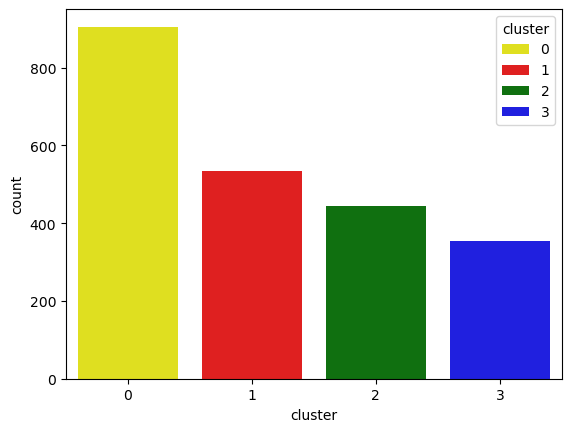

In [50]:
pal = ["yellow","red","green","blue"]
sns.countplot(x=X["cluster"], palette=pal, hue= X["cluster"])

<Axes: xlabel='Total_Spending', ylabel='Income'>

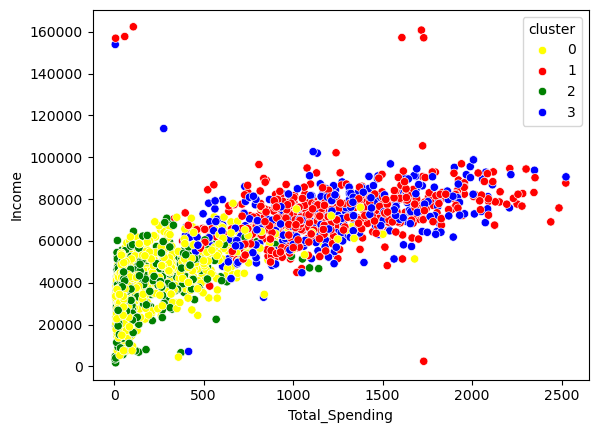

In [51]:
sns.scatterplot(x=X["Total_Spending"], y = X["Income"], hue = X["cluster"], palette=pal)

In [53]:
#Summary

cluster_summary=X.groupby("cluster").mean()
print(cluster_summary)

               Income    Recency  NumDealsPurchases  NumWebPurchases  \
cluster                                                                
0        39680.580110  48.914917           2.594475         3.153591   
1        72808.445693  49.202247           1.958801         5.687266   
2        36960.143018  48.319820           2.594595         2.713964   
3        70722.681303  50.504249           1.855524         5.790368   

         NumCatalogPurchases  NumStorePurchases  NumWebVisitsMonth  Complain  \
cluster                                                                        
0                   0.969061           4.143646           6.307182  0.011050   
1                   5.498127           8.659176           3.580524  0.005618   
2                   0.837838           3.623874           6.659910  0.011261   
3                   5.014164           8.430595           3.728045  0.005666   

         Response        Age  Customer_Tenure_Days  Total_Spending  \
cluster         